# Paquetes

**Herramientas utilizadas:**

*   flask: Microframework para crear la aplicación web y definir rutas.
*   transformers: Biblioteca para cargar modelos NLP preentrenados (modelo de traducción)
*   torch: Framework de deep learning utilizado por transformers como backend.
*   flask-cors: Extensión que habilita CORS para permitir peticiones desde distintos orígenes.
*   pyngrok: Permite exponer el servidor local a internet mediante túneles públicos.
*   sacremoses: Tokenizador (basado en Moses) que mejora el preprocesamiento de texto en ciertos modelos.

In [1]:
pip install flask transformers torch flask-cors pyngrok sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 45.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
from pyngrok import ngrok
import threading
from flask import Flask, request, jsonify
from flask_cors import CORS
from pyngrok import ngrok
from transformers import pipeline

# Token de ngrok
ngrok.set_auth_token("2u2Sd3RAx6uNy6OoswNSDwfA4t3_jqQ46MoXcaqYGLgNN1Re")


# Flujo Aplicacion Web para Google Colab

In [3]:
# Creamos la app Flask
app = Flask(__name__)

# Habilitamos CORS para permitir peticiones desde cualquier origen
CORS(app)

# Cargamos un pipeline de traducción (inglés -> español como ejemplo)
translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")

# Página HTML que se servirá al entrar a "/"
html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8"/>
  <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
  <title>Servicio de Traducción</title>
  <script>
    async function translateText() {
      const inputText = document.getElementById("inputText").value;
      const response = await fetch("/translate", {
        method: "POST",
        headers: { "Content-Type": "application/json" },
        body: JSON.stringify({ text: inputText })
      });
      const data = await response.json();

      // Si hay error, mostramos el mensaje de error
      if (data.error) {
        document.getElementById("translationResult").innerText = "Error: " + data.error;
      } else {
        document.getElementById("translationResult").innerText = "Traducción: " + data.translated_text;
      }
    }
  </script>
</head>
<body>
  <div style="width: 60%; margin: 0 auto; text-align: center;">
    <h1>Servicio de Traducción (HuggingFace)</h1>
    <textarea id="inputText" rows="4" cols="50" placeholder="Escribe texto en inglés para traducir..."></textarea>
    <br><br>
    <button onclick="translateText()">Traducir</button>
    <p id="translationResult" style="margin-top:20px; font-size:18px; font-weight:bold;"></p>
  </div>
</body>
</html>
"""

# Ruta raíz: sirve la página HTML
@app.route("/")
def home():
    return html_content

# Ruta /translate: recibe POST con JSON {"text": "..."} y devuelve la traducción
@app.route("/translate", methods=["POST"])
def translate():
    data = request.json
    if not data or "text" not in data:
        return jsonify({"error": "Falta el texto en el campo 'text'"}), 400

    text_to_translate = data["text"]
    if not text_to_translate.strip():
        return jsonify({"error": "El texto está vacío"}), 400

    # Llamamos al pipeline de traducción
    translated = translator(text_to_translate)[0]["translation_text"]
    return jsonify({"translated_text": translated}), 200

# Función para arrancar Flask en el puerto 5000
def run_flask():
    app.run(host="0.0.0.0", port=5000)

# Creamos el túnel ngrok en el puerto 5000
public_url = ngrok.connect(5000)
print(" * URL pública de ngrok:", public_url.public_url)

# Lanzamos Flask en segundo plano (en un hilo)
thread = threading.Thread(target=run_flask)
thread.start()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

Device set to use cuda:0


 * URL pública de ngrok: https://7c0e-34-16-154-107.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


# Imagen Servicio Web

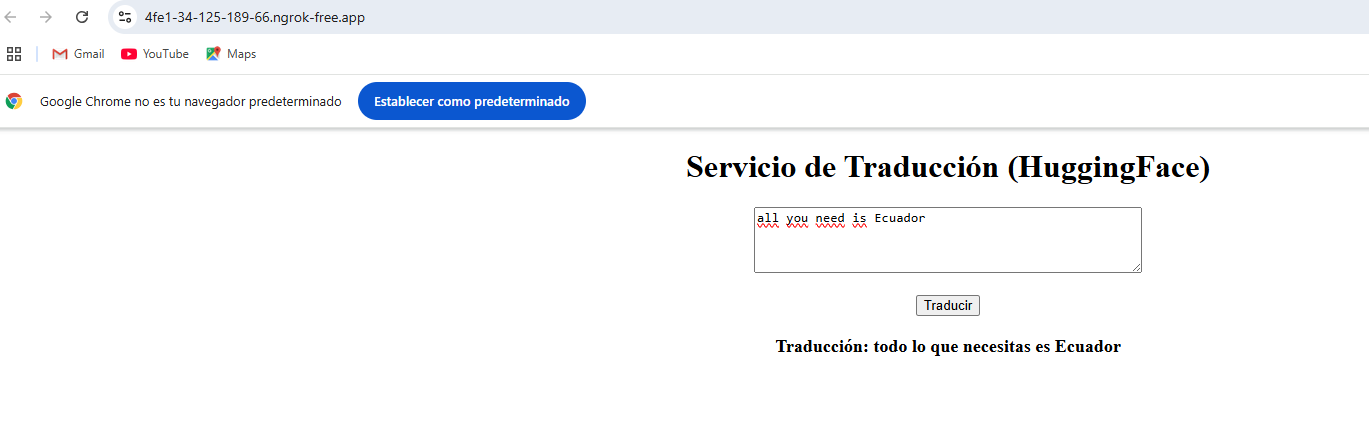

In [4]:
!pkill -f ngrok

In [ ]:
!fuser -k 5000/tcp

# Conclusiones

## 1. Aplicación Web con Flask
- **Función:** Se crea una instancia de Flask para definir la API web, estableciendo rutas para servir contenido (la interfaz HTML) y procesar solicitudes (el endpoint de traducción).
- **Beneficio:** Permite estructurar el servicio de forma modular y sencilla, facilitando su desarrollo y mantenimiento.
- **Desafío:** Adaptar el servidor para que funcione correctamente en entornos interactivos como Google Colab, donde el servidor debe ejecutarse en segundo plano sino no se ejecutaba.

## 2. Habilitación de CORS con Flask-CORS
- **Función:** Se habilita CORS para permitir peticiones desde cualquier origen, lo cual es esencial para la comunicación entre el front-end y la API.
- **Beneficio:** Evita bloqueos por parte del navegador al realizar peticiones cross-origin, garantizando la interoperabilidad de la aplicación.


## 3. Pipeline de Traducción con Transformers
- **Función:** Se carga un pipeline de Hugging Face que utiliza el modelo `"Helsinki-NLP/opus-mt-en-es"` para traducir texto de inglés a español.
- **Beneficio:** Aprovecha modelos de alta calidad sin necesidad de entrenar desde cero, permitiendo una rápida implementación de funcionalidades de NLP.


## 4. Interfaz HTML Integrada: Servicio de Traducción (HuggingFace)
- **Función:** Se define una página HTML que actúa como interfaz de usuario, con un formulario que permite ingresar texto y un botón que envía la solicitud de traducción.
- **Beneficio:** Proporciona una forma interactiva y visual para probar el servicio, mejorando la experiencia del usuario y facilitando la demostración del servicio.
- **Desafío:** Realizar la ejecución del codigo html y publicarlo por npgrok.

## 5. Definición de Rutas en Flask
- **Función:** Se crean dos rutas principales:
  - `"/"`: Sirve la página HTML.
  - `"/translate"`: Recibe solicitudes POST con el texto a traducir y devuelve la traducción en formato JSON.
- **Beneficio:** Separa claramente la lógica de presentación de la lógica de negocio, haciendo el código más organizado y escalable.

## 6. Exposición Pública con pyngrok
- **Función:** Se utiliza pyngrok para crear un túnel que expone el servidor Flask (corriendo en el puerto 5000) a Internet, generando una URL pública.
- **Beneficio:** Permite acceder al servicio desde fuera del entorno local sin necesidad de desplegarlo en un servidor público, ideal para pruebas y demostraciones en Google Colab.

## 7. Ejecución en Segundo Plano con Threading
- **Función:** Se inicia el servidor Flask en un hilo aparte utilizando la librería `threading`, de modo que la celda de Colab siga siendo interactiva.
- **Beneficio:** Permite ejecutar el servidor sin bloquear la ejecución de otras celdas, facilitando un flujo de trabajo interactivo en Google Colab.
- **Desafío:** Manejar correctamente la ejecución concurrente para evitar conflictos o bloqueos en el entorno de ejecución.

